In [122]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [123]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

In [124]:
# Create a copy of this dataset. The new copy will be standardized
# so we can compare the performance of both the standardized and non-standardized datasets
standardized_data = data.copy()
standardized_data['value_eur'] = np.log(standardized_data['value_eur'])

y = data['value_eur']
x = data.drop(columns= 'value_eur')

sdz_y = standardized_data['value_eur']
sdz_x = standardized_data.drop(columns= 'value_eur')

sdz_y

0        18.172219
1        18.598827
2        17.622173
3        18.675323
4        18.647816
           ...    
17036    11.156251
17037    11.608236
17038    11.512925
17039    11.608236
17040    11.608236
Name: value_eur, Length: 17041, dtype: float64

In [125]:
x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=0
)

x_train

,position,overall,potential,wage_eur,age,height_cm,weight_kg,club_contract_valid_until,preferred_foot,weak_foot,...,nationality_name_Uganda,nationality_name_Ukraine,nationality_name_United Arab Emirates,nationality_name_United States,nationality_name_Uruguay,nationality_name_Uzbekistan,nationality_name_Venezuela,nationality_name_Wales,nationality_name_Zambia,nationality_name_Zimbabwe
5118,0,69,72,5000.0,25,188,78,2023.0,1,3,...,0,0,0,0,0,0,0,0,0,0
13220,1,61,70,800.0,21,168,61,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
10922,0,64,64,500.0,28,184,78,2021.0,1,2,...,0,0,0,0,0,0,0,0,0,0
13891,0,60,69,550.0,20,175,70,2022.0,0,2,...,0,0,0,0,0,0,0,0,0,0
13678,1,60,60,900.0,30,187,85,2023.0,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,65,68,9000.0,25,188,80,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
13123,0,61,69,2000.0,22,180,75,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
9845,1,65,80,2000.0,21,174,61,2022.0,1,2,...,0,0,0,0,0,0,0,0,0,0
10799,1,64,72,500.0,23,180,73,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# Standardize the train data
sd_x_train, sd_x_test, sdz_y_train, sdz_y_test = train_test_split(
   sdz_x, sdz_y, test_size=0.2, random_state=0
)

scaler = StandardScaler()
sdz_x_train = scaler.fit_transform(sd_x_train)
sdz_x_test = scaler.transform(sd_x_test)

sdz_x_train

array([[-1.18158287,  0.45282297,  0.12640773, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-0.04941603, -0.7278556 , -0.20418031, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-1.18158287, -0.28510114, -1.19594441, ..., -0.08377233,
        -0.02266631, -0.02841789],
       ...,
       [-0.04941603, -0.13751631,  1.44875986, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-0.04941603, -0.28510114,  0.12640773, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-1.18158287,  1.04316225,  1.61405388, ..., -0.08377233,
        -0.02266631, -0.02841789]])

In [127]:
lr = LinearRegression()
lr.fit(x_train, y_train)
 
c = lr.intercept_
c

-50877661136929.38

In [128]:
sdz_lr = LinearRegression()
sdz_lr.fit(sdz_x_train, sdz_y_train)
 
sdz_c = lr.intercept_
sdz_c

-50877661136929.38

In [129]:
m = lr.coef_
m

array([ 1.31399849e+05,  2.67813841e+05,  5.27352948e+04,  2.99507751e+02,
       -3.16022226e+05,  3.31297831e+04, -1.78759533e+04,  2.42193121e+05,
       -7.70480761e+04,  7.16489115e+04, -8.40632679e+04,  2.20365138e+06,
        1.84664647e+05,  1.32021798e+05, -1.48988815e+05, -1.70242722e+05,
        2.03905364e+05, -2.35413953e+03, -2.95763622e+04,  3.03018225e+04,
        7.55211586e+04, -1.88595313e+04,  5.36972162e+04,  1.09798263e+04,
       -9.86742017e+04,  7.92192002e+03,  1.14801124e+04,  1.91692732e+04,
       -9.87691902e+04, -5.54568327e+04, -6.94361077e+04, -3.11707215e+04,
        1.74700973e+04,  1.25410032e+04,  2.28302722e+04, -4.97978890e+03,
        1.44726240e+04,  3.24266587e+04,  2.41961261e+04,  5.54832080e+03,
       -5.40777820e+03,  6.44043349e+03,  4.34218238e+04,  4.84004628e+03,
       -9.57670309e+03,  6.06636031e+03, -7.00965771e+03,  3.53924304e+03,
       -5.77361355e+13, -5.81449209e+13, -5.77361347e+13,  1.00896039e+06,
       -5.77361348e+13, -

In [130]:
sdz_m = sdz_lr.coef_
sdz_m

array([ 1.93207047e-02,  1.18559646e+00,  5.24359245e-02,  8.29629566e-02,
       -4.62251204e-01,  6.42845781e-03,  6.50830916e-03,  3.26772433e-03,
       -2.29920132e-03, -2.15641484e-03,  9.92567256e-03,  2.87366268e-02,
       -2.03664419e-03, -1.45404638e-02, -2.24846009e-02, -3.28276053e-02,
       -6.68404553e-02,  1.98646446e-01,  5.11796554e-02,  3.34597659e-03,
        2.30155268e-02, -1.02680115e-02,  1.70252478e-02,  1.38503912e-02,
        4.21007772e-02, -1.01984446e-02,  1.00319336e-02,  1.35652632e-03,
        1.28575784e-02,  1.89394744e-02,  2.50926544e-02, -2.01530440e-03,
        2.02448019e-02,  8.38392438e-03, -3.96084950e-04, -1.73462310e-03,
       -4.97728371e-04, -3.44824856e-02, -6.15970089e-03, -1.47102682e-02,
       -4.70966053e-02,  8.11085630e-03,  1.12766715e-02, -1.83264523e-04,
       -2.37008039e-03, -6.56145824e-02, -6.33200284e-02, -3.57072750e-02,
       -6.61066175e+10,  1.22659156e+10, -6.25351934e+10,  1.50748195e-03,
       -6.25351934e+10,  

In [131]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([ 2735489.6484375,  1618042.21875  ,   882232.859375 , ...,
        1613302.390625 ,  3331338.546875 , 13907795.8125   ])

In [132]:
sdz_y_pred_train = sdz_lr.predict(sdz_x_train)
sdz_y_pred_train

array([14.46823647, 13.48800696, 13.0569105 , ..., 14.23923857,
       13.69912241, 15.69648975])

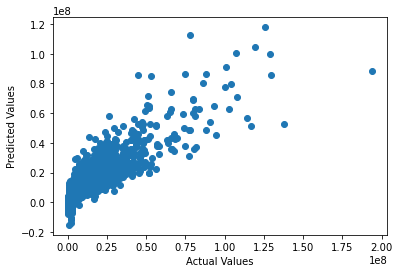

In [133]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

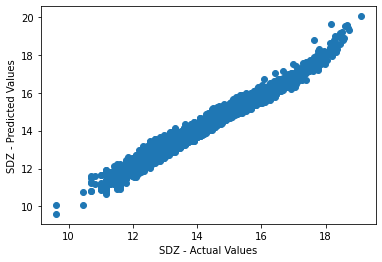

In [134]:
plt.scatter(sdz_y_train, sdz_y_pred_train)
plt.xlabel('SDZ - Actual Values')
plt.ylabel('SDZ - Predicted Values')
plt.show()

In [135]:
r2_score(y_train, y_pred_train)

0.78911647136284

In [136]:
r2_score(sdz_y_train, sdz_y_pred_train)

0.9791557155614679

In [137]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([  396986.8984375,    60254.0703125,  1306244.9296875, ...,
         495919.7109375, -1628869.2734375,   202014.71875  ])

In [138]:
sdz_y_pred_test = sdz_lr.predict(sdz_x_test)
sdz_y_pred_test

array([13.09398699, 13.43830156, 14.77455949, ..., 12.74599504,
       12.84751177, 13.23279619])

In [139]:
# I noticed that all the rows in the sdz_y_pred_test falls within the range of 10-20
# except for 11 rows with ridiculously large numbers. Because 11 is a very small number from
# over 5000 rows, I decided it's best to remove them because they completely skew the analysis.

Q1 = np.percentile(sdz_y_pred_test, 25)
Q3 = np.percentile(sdz_y_pred_test, 75)

IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 6 * IQR

# Use boolean indexing to filter out outliers from sdz_y_pred_test
outliers_removed_sdz_y_pred_test = sdz_y_pred_test[(sdz_y_pred_test >= lower_bound) & (sdz_y_pred_test <= upper_bound)]

# Use the same index to remove corresponding rows from sdz_y_test
outliers_removed_sdz_y_test = sdz_y_test[(sdz_y_pred_test >= lower_bound) & (sdz_y_pred_test <= upper_bound)]


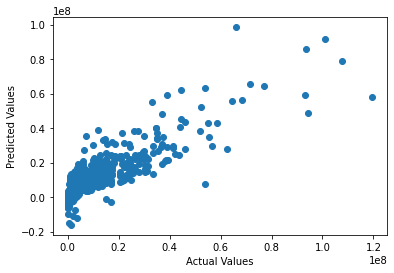

In [140]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

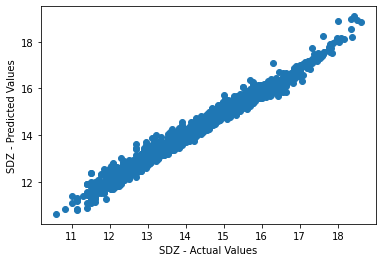

In [141]:
plt.scatter(outliers_removed_sdz_y_test, outliers_removed_sdz_y_pred_test)
plt.xlabel('SDZ - Actual Values')
plt.ylabel('SDZ - Predicted Values')
plt.show()

In [142]:
r2_score(y_test, y_pred_test)


0.7781749454964364

In [143]:
r2_score(outliers_removed_sdz_y_test, outliers_removed_sdz_y_pred_test)

0.9774320443755623

In [144]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

rmse

3596253.0672913305

In [145]:
# Calculate the Mean Squared Error (MSE)
sdz_mse = mean_squared_error(outliers_removed_sdz_y_test, outliers_removed_sdz_y_pred_test)

# Calculate the Root Mean Squared Error (RMSE)
sdz_rmse = np.sqrt(sdz_mse)

sdz_rmse

0.18005657199851258

In [157]:
cross_val_score_train = cross_val_score(lr, x_train, y_train, scoring='r2', cv=10)

print(np.mean(cross_val_score_train))

0.75


In [158]:
sdz_cross_val_score_train = cross_val_score(sdz_lr, sdz_x_train, sdz_y_train, scoring='r2', cv=10)
print(format(np.mean(sdz_cross_val_score_train), ".2f")) # -1.628361172706678e+24

-1628361172706678301261824.00
